# TRATAMENTO DE DADOS

In [41]:
# %pip install pandas openpyxl matplotlib numpy

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('faltas_treinamento_sujo.xlsx')
display(df.head(30))

,Nome,Departamento,Turno,Faltas,Dia_da_Semana_Ultima_Falta,Data_Ultima_Falta,Evadiu
0,Colaborador_001,Operações,Manhã,14,Quarta,18/01/2024,Sim
1,Colaborador_002,Operações,Manhã,1,Segunda,31/02/2024,Não
2,Colaborador_003,Vendas,Manhã,3,segunda,10/03/2024,Não
3,Colaborador_004,Marketing,manha,3,Segunda,21/01/2024,Não
4,Colaborador_005,RH,manha,1,Quarta,18/02/2024,Não
5,Colaborador_006,RH,manha,2,segunda,16/01/2024,Não
6,Colaborador_007,Marketing,Manhã,1,segunda,16/02/2024,Não
7,Colaborador_008,Operações,Manhã,11,Terça,11/01/2024,Sim
8,Colaborador_009,Financeiro,TARDE,2,segunda,21/01/2024,Não
9,Colaborador_010,TI,manha,2,segunda,18/03/2024,Não


### Parte 1: Tratamento básico

In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Nome                        224 non-null    object
 1   Departamento                224 non-null    object
 2   Turno                       224 non-null    object
 3   Faltas                      224 non-null    int64 
 4   Dia_da_Semana_Ultima_Falta  224 non-null    object
 5   Data_Ultima_Falta           224 non-null    object
 6   Evadiu                      210 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.4+ KB
None


In [43]:
# Correção de tipo de data
    # de 'object' para 'datetime64'
df['Data_Ultima_Falta'] = pd.to_datetime(df['Data_Ultima_Falta'], format='%d/%m/%Y', errors='coerce')
display(df, df.info())

# mostrando que datas são incorretas, ex: 31/02/2020 com NaT (Not a Time)
display(df[df['Data_Ultima_Falta'].isna()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Nome                        224 non-null    object        
 1   Departamento                224 non-null    object        
 2   Turno                       224 non-null    object        
 3   Faltas                      224 non-null    int64         
 4   Dia_da_Semana_Ultima_Falta  224 non-null    object        
 5   Data_Ultima_Falta           212 non-null    datetime64[ns]
 6   Evadiu                      210 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 12.4+ KB


,Nome,Departamento,Turno,Faltas,Dia_da_Semana_Ultima_Falta,Data_Ultima_Falta,Evadiu
0,Colaborador_001,Operações,Manhã,14,Quarta,2024-01-18,Sim
1,Colaborador_002,Operações,Manhã,1,Segunda,NaT,Não
2,Colaborador_003,Vendas,Manhã,3,segunda,2024-03-10,Não
3,Colaborador_004,Marketing,manha,3,Segunda,2024-01-21,Não
4,Colaborador_005,RH,manha,1,Quarta,2024-02-18,Não
...,...,...,...,...,...,...,...
219,Colaborador_056,Operações,Tarde,2,segunda,2024-01-05,Não
220,Colaborador_102,Vendas,manha,3,segunda,2024-02-15,Não
221,Colaborador_188,Vendas,Manhã,3,segunda,2024-02-04,NaN
222,Colaborador_147,Marketing,Tarde,1,segunda,2024-02-02,Não


None

,Nome,Departamento,Turno,Faltas,Dia_da_Semana_Ultima_Falta,Data_Ultima_Falta,Evadiu
1,Colaborador_002,Operações,Manhã,1,Segunda,NaT,Não
59,Colaborador_060,RH,Tarde,1,Quarta,NaT,Não
84,Colaborador_085,Marketing,manha,1,Quinta,NaT,Não
85,Colaborador_086,RH,Tarde,3,segunda,NaT,NaN
135,Colaborador_136,Marketing,Tarde,2,Quinta,NaT,Não
138,Colaborador_139,Marketing,Manhã,1,Quinta,NaT,Não
143,Colaborador_144,Marketing,Tarde,1,Segunda,NaT,Não
165,Colaborador_166,Marketing,TARDE,4,Quarta,NaT,Não
174,Colaborador_175,Financeiro,TARDE,0,Sexta,NaT,Não
188,Colaborador_189,RH,manha,1,Quarta,NaT,Não


In [44]:
# Normalizar 'Turnos' e 'Dias'

# Correção de acentuação em Turno = Manha >> Turno = Manhã
    # Visto que o banco de dados é todo em PT-BR
df['Turno'] = df['Turno'].str.strip().str.lower().str.title().replace({'Manha': 'Manhã'})

df['Dia_da_Semana_Ultima_Falta'] = df['Dia_da_Semana_Ultima_Falta'].str.strip().str.lower().str.title()

display(df)

,Nome,Departamento,Turno,Faltas,Dia_da_Semana_Ultima_Falta,Data_Ultima_Falta,Evadiu
0,Colaborador_001,Operações,Manhã,14,Quarta,2024-01-18,Sim
1,Colaborador_002,Operações,Manhã,1,Segunda,NaT,Não
2,Colaborador_003,Vendas,Manhã,3,Segunda,2024-03-10,Não
3,Colaborador_004,Marketing,Manhã,3,Segunda,2024-01-21,Não
4,Colaborador_005,RH,Manhã,1,Quarta,2024-02-18,Não
...,...,...,...,...,...,...,...
219,Colaborador_056,Operações,Tarde,2,Segunda,2024-01-05,Não
220,Colaborador_102,Vendas,Manhã,3,Segunda,2024-02-15,Não
221,Colaborador_188,Vendas,Manhã,3,Segunda,2024-02-04,NaN
222,Colaborador_147,Marketing,Tarde,1,Segunda,2024-02-02,Não


### Parte 2: Remoção e Substituição

In [45]:
# remover registros duplicados

# assim mostra os valores e o Keep mostra ambas as duplicatas, não só a segunda repetição
display(df[df.duplicated(keep=False)])

df = df.drop_duplicates()

,Nome,Departamento,Turno,Faltas,Dia_da_Semana_Ultima_Falta,Data_Ultima_Falta,Evadiu
55,Colaborador_056,Operações,Tarde,2,Segunda,2024-01-05,Não
91,Colaborador_092,Vendas,Manhã,0,Quinta,2024-01-09,Não
101,Colaborador_102,Vendas,Manhã,3,Segunda,2024-02-15,Não
146,Colaborador_147,Marketing,Tarde,1,Segunda,2024-02-02,Não
187,Colaborador_188,Vendas,Manhã,3,Segunda,2024-02-04,NaN
219,Colaborador_056,Operações,Tarde,2,Segunda,2024-01-05,Não
220,Colaborador_102,Vendas,Manhã,3,Segunda,2024-02-15,Não
221,Colaborador_188,Vendas,Manhã,3,Segunda,2024-02-04,NaN
222,Colaborador_147,Marketing,Tarde,1,Segunda,2024-02-02,Não
223,Colaborador_092,Vendas,Manhã,0,Quinta,2024-01-09,Não


In [46]:
# preencher 'Evadiu' vazios por desconhecido

df['Evadiu'] = df['Evadiu'].fillna('Desconhecido')
display(df[80:90])

,Nome,Departamento,Turno,Faltas,Dia_da_Semana_Ultima_Falta,Data_Ultima_Falta,Evadiu
80,Colaborador_081,Marketing,Tarde,1,Quarta,2024-01-04,Não
81,Colaborador_082,Operações,Tarde,4,Quinta,2024-03-20,Não
82,Colaborador_083,Marketing,Manhã,5,Quinta,2024-02-29,Sim
83,Colaborador_084,RH,Tarde,2,Quinta,2024-02-18,Não
84,Colaborador_085,Marketing,Manhã,1,Quinta,NaT,Não
85,Colaborador_086,RH,Tarde,3,Segunda,NaT,Desconhecido
86,Colaborador_087,TI,Tarde,2,Sexta,2024-01-17,Não
87,Colaborador_088,Financeiro,Tarde,5,Quarta,2024-01-22,Sim
88,Colaborador_089,Operações,Manhã,5,Terça,2024-01-14,Sim
89,Colaborador_090,RH,Tarde,5,Segunda,2024-03-16,Sim


In [47]:
# substituir valores nulos da coluna Data_Ultima_Falta pela data mais comum.
df['Data_Ultima_Falta'] = df['Data_Ultima_Falta'].fillna(df['Data_Ultima_Falta'].mode()[0])
display(df[80:90])

,Nome,Departamento,Turno,Faltas,Dia_da_Semana_Ultima_Falta,Data_Ultima_Falta,Evadiu
80,Colaborador_081,Marketing,Tarde,1,Quarta,2024-01-04,Não
81,Colaborador_082,Operações,Tarde,4,Quinta,2024-03-20,Não
82,Colaborador_083,Marketing,Manhã,5,Quinta,2024-02-29,Sim
83,Colaborador_084,RH,Tarde,2,Quinta,2024-02-18,Não
84,Colaborador_085,Marketing,Manhã,1,Quinta,2024-03-20,Não
85,Colaborador_086,RH,Tarde,3,Segunda,2024-03-20,Desconhecido
86,Colaborador_087,TI,Tarde,2,Sexta,2024-01-17,Não
87,Colaborador_088,Financeiro,Tarde,5,Quarta,2024-01-22,Sim
88,Colaborador_089,Operações,Manhã,5,Terça,2024-01-14,Sim
89,Colaborador_090,RH,Tarde,5,Segunda,2024-03-16,Sim


### Parte 3: Correções e Detecção de Outliers

In [48]:
# Conversão 'Faltas' type=float para type=int
    # já era type=int anteriormente

# astype transforma tipo de dado
df['Faltas'] = df['Faltas'].astype(int)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Nome                        219 non-null    object        
 1   Departamento                219 non-null    object        
 2   Turno                       219 non-null    object        
 3   Faltas                      219 non-null    int64         
 4   Dia_da_Semana_Ultima_Falta  219 non-null    object        
 5   Data_Ultima_Falta           219 non-null    datetime64[ns]
 6   Evadiu                      219 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 13.7+ KB


None

In [49]:
# Substituir outliers de faltas por np.nan e depois pela mediana.

# IQR (Intervalo Interquartil) é uma medida estatística de dispersão que representa os 50% centrais dos dados.
# Ele é calculado como: IQR = Q3 - Q1
# - Q1 (1º quartil) é o valor abaixo do qual estão os 25% menores valores.
# - Q3 (3º quartil) é o valor abaixo do qual estão os 75% menores valores.

# Os valores considerados normais estão entre Q1 e Q3 (ou seja, dentro do IQR).
# Já os valores que estão:
# - abaixo de Q1 - 1.5 * IQR, ou
# - acima de Q3 + 1.5 * IQR
# são considerados OUTLIERS (valores extremos que fogem do padrão dos dados).

import numpy as np

# calculo do intervalo interquantil
q1 = df['Faltas'].quantile(0.25)
q3 = df['Faltas'].quantile(0.75)
iqr = q3 - q1

# definição de limites min e max
limite_minimo = q1 - 1.5 * iqr
limite_maximo = q3 + 1.5 * iqr

# substituição de OUTLIERS por np.nan
    # .loc[condição, nome da coluna] = alteração
    # em PANDAS não se pode usar OR neste caso, deve se usar PIPE que é o " | "
df.loc[(df['Faltas'] < limite_minimo) | (df['Faltas'] > limite_maximo), 'Faltas'] = np.nan

# substituir NaN por mediana
df['Faltas'] = df['Faltas'].fillna(df['Faltas'].median())

In [50]:
# criar flag 'Faltas_Suspeitas' para 'Faltas' > 10
    # se a condição for atingida em um futuro caso, vai receber a flag = True

df['Faltas_Suspeitas'] = df['Faltas'] > 10
display(df[df['Faltas_Suspeitas'] == True])


,Nome,Departamento,Turno,Faltas,Dia_da_Semana_Ultima_Falta,Data_Ultima_Falta,Evadiu,Faltas_Suspeitas


# ANÁLISE DE DADOS

### Análise Descritiva Avançada
#### Resultado da análise
1. Os 3 departamentos com o maior número de evasões foram: \
    Marketing com 4 evasões \
    Financeiro e Operações com 4 evasões em cada setor

2. No turno da tarde, 8,85% dos colaboradores evadiram

3. Há um desvio padrão leve nas faltas por turno
    


In [51]:
# Número total de evasões por departamento
evasoes = df[df['Evadiu'] == 'Sim']
display(evasoes.groupby('Departamento').size())

Departamento
Financeiro    4
Marketing     6
Operações     4
RH            3
TI            1
Vendas        3
dtype: int64

In [52]:
# Percentual de evasão considerando apenas os que participaram do turno da tarde
    # .sum() soma os valores dentro de cada celula da coluna
    # .size() retorna o numero total de elementos
    # .shape[0] retorna o numero de linhas que atendem o filtrp anterior
total_tarde = df[(df['Turno'] == 'Tarde')].shape[0]
evasoes_tarde = df[(df['Evadiu'] == 'Sim') & (df['Turno'] == 'Tarde')].shape[0]

porcentagem_evasoes_tarde = (evasoes_tarde * 100) / total_tarde

print(f'Porcentagem de evasões à tarde: {porcentagem_evasoes_tarde:.2f}%')

Porcentagem de evasões à tarde: 8.85%


In [53]:
# Desvio padrão de faltas por turno (Adição da média para comparação)
    # .std() é a função de desvio padrão
desvio_padrao_turno = df.groupby('Turno')['Faltas'].std()

display(desvio_padrao_turno)

print(df.groupby('Turno')['Faltas'].mean())

Turno
Manhã    1.376872
Tarde    1.430269
Name: Faltas, dtype: float64

Turno
Manhã    1.905660
Tarde    1.911504
Name: Faltas, dtype: float64


### ANÁLISE TEMPORAL
#### Resultado da análise
1. Houve um aumento exponencial no número de faltas nos 3 primeiros meses de 2024

2. O mês com o maior número de faltas foi Março com 161 faltas no total

3. As 3 semanas com o maior número de faltas foram: \
    1º: Semana dos dias 18 a 24 de março com 57 faltas \
    2º: Semana dos dias 05 a 11 de fevereiro com 38 faltas \
    3º: Semana dos dias 25 a 31 de março com 36 faltas

4. O dia da semana em que ocorre mais faltas, é a Segunda-feira

DETALHE: \
    Sem a remoção de Outliers, o mês com mais faltas seria Janeiro com 193 faltas

Mes_Falta
2024-01    123.0
2024-02    134.0
2024-03    161.0
Freq: M, Name: Faltas, dtype: float64

<Axes: xlabel='Mes_Falta'>

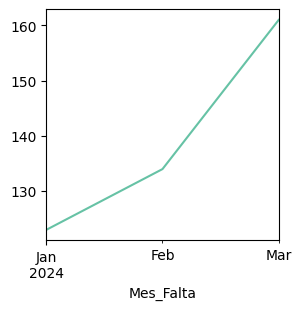

In [54]:
# Mês com maior número de faltas

df_falta = df
df_falta['Mes_Falta'] = df_falta['Data_Ultima_Falta'].dt.to_period('M')
faltas_mes = df_falta.groupby('Mes_Falta')['Faltas'].sum()

# exibição simples
display(faltas_mes)

# exibição visual
faltas_mes.plot(kind='line', figsize=(3,3), colormap='Set2')

Semana_Ultima_Falta
2024-01-29/2024-02-04    21.0
2024-01-22/2024-01-28    23.0
2024-03-04/2024-03-10    24.0
2024-02-12/2024-02-18    29.0
2024-01-15/2024-01-21    30.0
2024-01-08/2024-01-14    30.0
2024-02-26/2024-03-03    31.0
2024-01-01/2024-01-07    33.0
2024-03-11/2024-03-17    33.0
2024-02-19/2024-02-25    33.0
2024-03-25/2024-03-31    36.0
2024-02-05/2024-02-11    38.0
2024-03-18/2024-03-24    57.0
Freq: W-SUN, Name: Faltas, dtype: float64

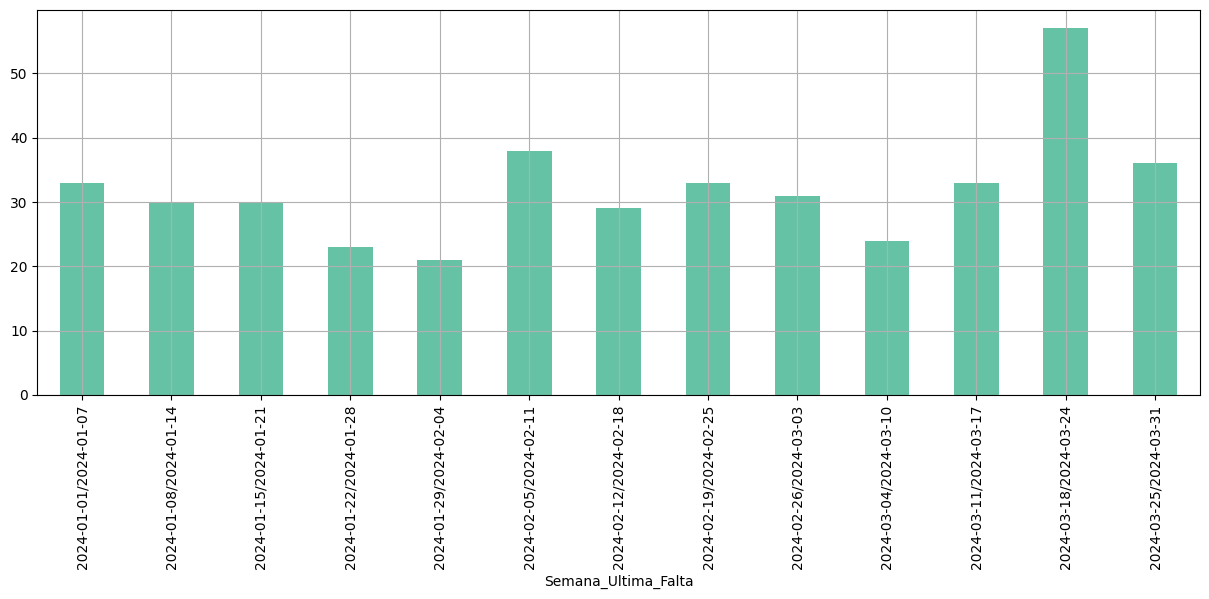

In [55]:
# Semana com maior concentração de ausências
df_falta['Semana_Ultima_Falta'] = df_falta['Data_Ultima_Falta'].dt.to_period('W')

faltas_por_semana = df_falta.groupby('Semana_Ultima_Falta')['Faltas'].sum()

# exibição de faltas por semana de forma CRESCENTE
display(faltas_por_semana.sort_values())

faltas_por_semana.plot(kind='bar', figsize=(15,5), colormap='Set2')
plt.grid()


Dia_da_Semana_Ultima_Falta
Segunda    146.0
Terça       59.0
Quarta      74.0
Quinta      78.0
Sexta       61.0
Name: Faltas, dtype: float64

<Axes: xlabel='Dia_da_Semana_Ultima_Falta'>

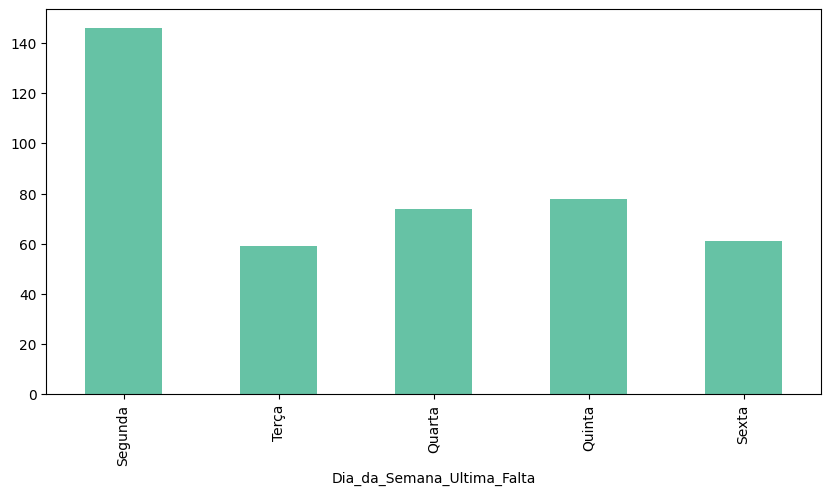

In [56]:
# Cruzamerto do dia da semana e quantidade de evasões.
relacao_dia_da_semana_e_quantidade_evasoes = df_falta.groupby('Dia_da_Semana_Ultima_Falta')['Faltas'].sum()

# ajustando dias da semana
ordem_dias_uteis = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta']
relacao_dia_da_semana_e_quantidade_evasoes = relacao_dia_da_semana_e_quantidade_evasoes.reindex(ordem_dias_uteis)

display(relacao_dia_da_semana_e_quantidade_evasoes)

relacao_dia_da_semana_e_quantidade_evasoes.plot(kind='bar', figsize=(10,5), colormap='Set2')


### Análise de Risco
#### Resultado da análise
1. Devido à remoção de Outliers, a proporção de Risco Alto de Evasão foi reduzida em grande parte dos casos
2. Não foram encontradas relações relevantes entre o Turno da Tarde e o Risco de Evasão Elevado

In [57]:
# Risco de evasão

# Analisar se Remoção de Outliers é necessário, tendo em vista que o ajuste pela mediana causou muitas evasões com quantidade de faltas == 2

# exibição de todos os casos de evasão
# display(df[df['Evadiu'] == 'Sim'])

# definição manual de risco de evasão com pd.cut
df['Risco_Evasao'] = pd.cut(df['Faltas'], bins=[-1,2,5,16], labels=['Baixo', 'Moderado', 'Alto'])
df


,Nome,Departamento,Turno,Faltas,Dia_da_Semana_Ultima_Falta,Data_Ultima_Falta,Evadiu,Faltas_Suspeitas,Mes_Falta,Semana_Ultima_Falta,Risco_Evasao
0,Colaborador_001,Operações,Manhã,2.0,Quarta,2024-01-18,Sim,False,2024-01,2024-01-15/2024-01-21,Baixo
1,Colaborador_002,Operações,Manhã,1.0,Segunda,2024-03-20,Não,False,2024-03,2024-03-18/2024-03-24,Baixo
2,Colaborador_003,Vendas,Manhã,3.0,Segunda,2024-03-10,Não,False,2024-03,2024-03-04/2024-03-10,Moderado
3,Colaborador_004,Marketing,Manhã,3.0,Segunda,2024-01-21,Não,False,2024-01,2024-01-15/2024-01-21,Moderado
4,Colaborador_005,RH,Manhã,1.0,Quarta,2024-02-18,Não,False,2024-02,2024-02-12/2024-02-18,Baixo
...,...,...,...,...,...,...,...,...,...,...,...
214,Colaborador_215,Operações,Tarde,3.0,Segunda,2024-02-09,Não,False,2024-02,2024-02-05/2024-02-11,Moderado
215,Colaborador_216,Operações,Manhã,1.0,Segunda,2024-03-28,Não,False,2024-03,2024-03-25/2024-03-31,Baixo
216,Colaborador_217,Financeiro,Tarde,2.0,Segunda,2024-01-24,Não,False,2024-01,2024-01-22/2024-01-28,Baixo
217,Colaborador_218,RH,Tarde,1.0,Terça,2024-02-07,Não,False,2024-02,2024-02-05/2024-02-11,Baixo


In [68]:
# Distribuição de risco por setor

distribuicao = df.groupby(['Departamento', 'Risco_Evasao']).size().unstack()
display(distribuicao)


C:\Users\Igor Moura\AppData\Local\Temp\ipykernel_17076\2178382898.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby(['Departamento', 'Risco_Evasao']).size().unstack()


Risco_Evasao,Baixo,Moderado,Alto
Departamento,,,
Financeiro,26,9,0
Marketing,30,11,0
Operações,39,13,0
RH,21,10,0
TI,20,10,0
Vendas,20,9,1


In [60]:
# Relação de risco por turno
    # Não há relação entre risco alto e o turno da tarde

distribuicao = df.groupby(['Turno', 'Risco_Evasao']).size().unstack()

display(distribuicao)

C:\Users\Igor Moura\AppData\Local\Temp\ipykernel_17076\3543141114.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby(['Turno', 'Risco_Evasao']).size().unstack()


Risco_Evasao,Baixo,Moderado,Alto
Turno,,,
Manhã,76,29,1
Tarde,80,33,0


### Visualizações estratégicas
#### Resultado da análise


KeyError: "'Rainbow' is not a known colormap name"

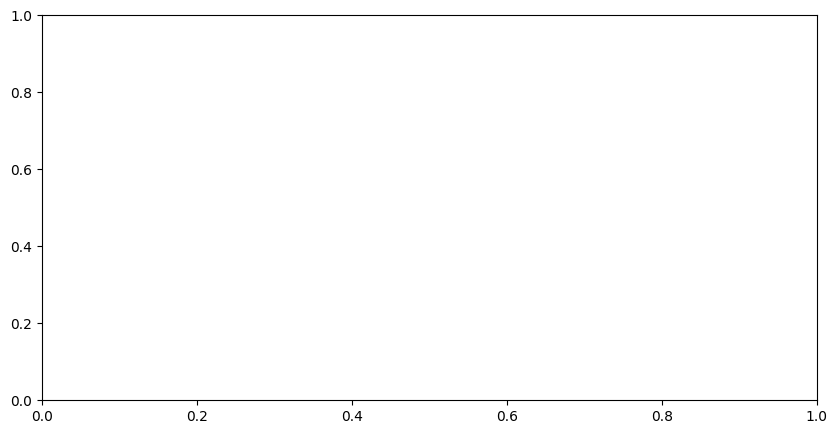

In [ ]:
# Faltas por departamento
faltas_departamento = df.groupby('Departamento')['Faltas'].size()

faltas_departamento.plot(kind='bar', figsize=(10,5), colormap='Set2')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.title('Faltas por Departamento')
plt.ylabel('Total de Faltas')